# Project: Investigate the FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The data used for this project comes from the [FBI's National Instant Criminal Background Check System](https://www.fbi.gov/about-us/cjis/nics). The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from [census.gov](https://www.google.com/url?q=https://www.census.gov/&sa=D&ust=1532469042127000).


### Question(s) for Analysis
1.What is the overall Trend of Gun Purchases over time?

2. Top 10 states with the most and least gun registrations over time?

3. What is the mostm popular gun?

4. What is the the total number of registered guns in each states over time

In [105]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, data will be loaded in, checked for cleanliness and trimmed before cleaning for analysis. 

In [141]:
# Load census dataset
census = pd.read_csv('U.S. Census Data.csv' )
census


,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
3,Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,"""05"""
4,California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""
5,Colorado,5540545,5029324,0.102,5029196,0.061,0.068,0.228,0.244,0.134,...,547352,284554,194508,85849,442365,51722,469524,48.5,103641.89,"""08"""
6,Connecticut,3576452,3574114,0.001,3574097,0.052,0.057,0.211,0.229,0.161,...,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36,"""09"""
7,Delaware,952065,897936,0.060,897934,0.058,0.062,0.215,0.229,0.175,...,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54,"""10"""
8,Florida,20612439,18804592,0.096,18801310,0.055,0.057,0.201,0.213,0.199,...,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76,"""12"""
9,Georgia,10310371,9688680,0.064,9687653,0.064,0.071,0.244,0.257,0.131,...,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49,"""13"""


In [107]:
# check number of rows and columns
census.shape

(50, 66)

In [108]:
# check for duplicates
census.duplicated().sum()

0

In [109]:
#check data types of census columns
census.dtypes

State                                                                                     object
Population estimates, July 1, 2016,  (V2016)                                               int64
Population estimates base, April 1, 2010,  (V2016)                                         int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    float64
Population, Census, April 1, 2010                                                          int64
                                                                                          ...   
Veteran-owned firms, 2012                                                                  int64
Nonveteran-owned firms, 2012                                                               int64
Population per square mile, 2010                                                         float64
Land area in square miles, 2010                                                          float64
FIPS Code                     

In [110]:
# statistical summary of the data
census.describe()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,0.041800,6.162876e+06,0.061600,0.065460,0.22750,0.238820,0.156160,0.13292,...,4.855009e+05,5.548918e+05,2.976230e+05,1.971777e+05,1.585531e+05,3.806367e+05,50502.72000,4.817082e+05,194.962000,70636.887800
std,7.271769e+06,6.848463e+06,0.033811,6.848235e+06,0.006612,0.007579,0.01977,0.019075,0.018321,0.01664,...,6.076460e+05,6.645229e+05,3.540115e+05,2.482425e+05,3.017390e+05,3.618627e+05,52073.87529,5.921109e+05,261.091465,85815.678218
min,5.855010e+05,5.637670e+05,-0.012000,5.636260e+05,0.048000,0.051000,0.19000,0.207000,0.104000,0.07700,...,4.814000e+04,6.242700e+04,3.003900e+04,1.934400e+04,2.354000e+03,3.851000e+04,6470.00000,5.135300e+04,1.200000,1033.810000
25%,1.850106e+06,1.833003e+06,0.016250,1.833004e+06,0.058000,0.062000,0.21650,0.226750,0.149250,0.12425,...,1.215145e+05,1.478222e+05,7.734775e+04,4.682475e+04,1.471450e+04,1.310602e+05,15796.50000,1.254088e+05,44.450000,36741.167500
50%,4.559320e+06,4.436412e+06,0.040500,4.436370e+06,0.061000,0.065000,0.22750,0.237000,0.156500,0.13500,...,3.014300e+05,3.535155e+05,1.951455e+05,1.274355e+05,6.306350e+04,2.769725e+05,38051.50000,2.959635e+05,98.750000,53891.280000
75%,7.198768e+06,6.680362e+06,0.063750,6.680312e+06,0.064000,0.069750,0.23675,0.248000,0.165000,0.14275,...,5.096492e+05,5.933612e+05,3.403212e+05,2.066418e+05,1.301590e+05,4.481730e+05,58253.25000,5.116312e+05,209.500000,81225.725000
max,3.925002e+07,3.725452e+07,0.127000,3.725396e+07,0.083000,0.095000,0.30200,0.315000,0.199000,0.17300,...,3.206958e+06,3.548449e+06,1.852580e+06,1.320085e+06,1.619857e+06,1.819107e+06,252377.00000,3.176341e+06,1195.500000,570640.950000


In [111]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   State                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     int64  
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     int64  
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 4   Population, Census, April 1, 2010                                                       50 non-null     int64  
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

In [112]:
# confirm we have 50 states
census_states = census.groupby('State').sum().index
len(census_states)

50

In [113]:
# check for missing values
census.isnull().any()

State                                                                                    False
Population estimates, July 1, 2016,  (V2016)                                             False
Population estimates base, April 1, 2010,  (V2016)                                       False
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    False
Population, Census, April 1, 2010                                                        False
                                                                                         ...  
Veteran-owned firms, 2012                                                                False
Nonveteran-owned firms, 2012                                                             False
Population per square mile, 2010                                                         False
Land area in square miles, 2010                                                          False
FIPS Code                                         

In [114]:
# Load and explore gun data
gun = pd.read_excel('gun-data.xlsx')
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [115]:
# check shape of gun data
gun.shape

(12485, 27)

In [116]:
#check for datatype
gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [117]:
# check for missing values
gun.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [118]:
# view columns in gun data
gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [119]:
# summary of gun data
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [120]:
# statistical summary of gun data
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [121]:
# check for duplicates
gun.duplicated().sum()

0

Check for number of states to ensure it corresponds with census data

In [122]:
gun.state.nunique()

55

I can see that there are 5 more states than the census data, this will be looked into during data cleaning


### Data Cleaning


Starting with the Gun Data

In [123]:
#check data types of gun columns
gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [124]:
# convert month to datetime
gun['month'] =  pd.to_datetime(gun['month'])

In [125]:
# use a for loop to check for the extra 5 states that are not in gun census data
for state in gun_states:
    if state not in census_states:
        print(state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [126]:
# drop the 5 states
gun = gun[gun.state != 'Guam']
gun = gun[gun.state != 'District of Columbia']
gun = gun[gun.state != 'Mariana Islands']
gun = gun[gun.state != 'Puerto Rico']
gun = gun[gun.state != 'Virgin Islands']

In [127]:
# confirm states have been dropped
gun.state.nunique()

50

In [128]:
# check for null values in the gun data
gun.isnull().any().any()

True

In [129]:
# check exactly how many null values there are
sum(gun.isnull().any())


21

In [130]:
# check the columns the null values are in
gun.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                      False
long_gun                     False
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [131]:
# the null values in this case cannot just be dropped each row holds important data, so i choose to fill the missing values with the mean 
gun.fillna(gun.mean(), inplace = True )

# check (should be false all through)
gun.isnull().any()


/tmp/ipykernel_18239/3031684485.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  gun.fillna(gun.mean(), inplace = True )
/tmp/ipykernel_18239/3031684485.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gun.fillna(gun.mean(), inplace = True )


month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [132]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      11350 non-null  datetime64[ns]
 1   state                      11350 non-null  object        
 2   permit                     11350 non-null  float64       
 3   permit_recheck             11350 non-null  float64       
 4   handgun                    11350 non-null  float64       
 5   long_gun                   11350 non-null  float64       
 6   other                      11350 non-null  float64       
 7   multiple                   11350 non-null  int64         
 8   admin                      11350 non-null  float64       
 9   prepawn_handgun            11350 non-null  float64       
 10  prepawn_long_gun           11350 non-null  float64       
 11  prepawn_other              11350 non-null  float64       
 12  rede

## Census Dataset

In [142]:
census.head()

,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
3,Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,"""05"""
4,California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""


In [143]:
# rename columns to ensure consistency
census.rename(columns = lambda x:x.lower(), inplace = True)
census.head()

,state,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)","population, percent change - april 1, 2010 (estimates base) to july 1, 2016, (v2016)","population, census, april 1, 2010","persons under 5 years, percent, july 1, 2016, (v2016)","persons under 5 years, percent, april 1, 2010","persons under 18 years, percent, july 1, 2016, (v2016)","persons under 18 years, percent, april 1, 2010","persons 65 years and over, percent, july 1, 2016, (v2016)",...,"all firms, 2012","men-owned firms, 2012","women-owned firms, 2012","minority-owned firms, 2012","nonminority-owned firms, 2012","veteran-owned firms, 2012","nonveteran-owned firms, 2012","population per square mile, 2010","land area in square miles, 2010",fips code
0,Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
3,Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,"""05"""
4,California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""


In [144]:
# drop duplicates
census.drop_duplicates(inplace = True)

#should be 0
sum(census.duplicated())

0

In the wrangling process we discovered some missing values in the census data, since we cannot drop them or replace with the mean as they are string variables, we will fill them with another string 'No data recorded'

In [145]:
# use fillna to fill missing values
census.fillna('No data Recorded', inplace = True)

# check for any null values, should be false all through
census.isnull().any()

state                                                                                    False
population estimates, july 1, 2016,  (v2016)                                             False
population estimates base, april 1, 2010,  (v2016)                                       False
population, percent change - april 1, 2010 (estimates base) to july 1, 2016,  (v2016)    False
population, census, april 1, 2010                                                        False
                                                                                         ...  
veteran-owned firms, 2012                                                                False
nonveteran-owned firms, 2012                                                             False
population per square mile, 2010                                                         False
land area in square miles, 2010                                                          False
fips code                                         

In [ ]:
census.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   population estimates, july 1, 2016,  (v2016)                                            50 non-null     int64 
 1   population estimates base, april 1, 2010,  (v2016)                                      50 non-null     object
 2   population, percent change - april 1, 2010 (estimates base) to july 1, 2016,  (v2016)   50 non-null     object
 3   population, census, april 1, 2010                                                       50 non-null     object
 4   persons under 5 years, percent, july 1, 2016,  (v2016)                                  50 non-null     object
 5   persons under 5 years, percent, april 1, 2010                             

<a id='eda'></a>
## Exploratory Data Analysis



###  What is the overall trend of gun purchases?

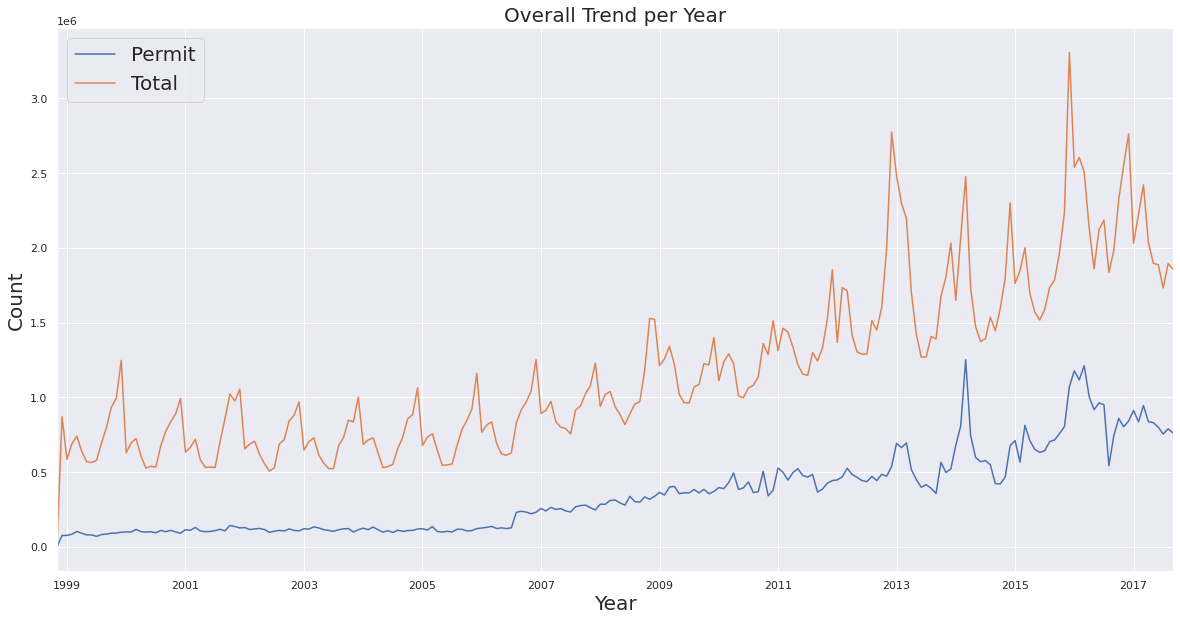

In [154]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
gun.groupby('month')['permit'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1),label = 'Permit')
gun.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (3, 2),label = 'Total')
plt.title('Overall Trend per Year',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

From the graph above, you can see it increases over the years, therefore it is a positive trend. 


### What States have the most and least Gun registrations over time?


In [174]:
# First we group by month, state and totals
most_regs_per_state = gun.groupby(['month', 'state'])['totals'].sum()
most_regs_per_state


month       state        
1998-11-01  Alabama           1062
            Alaska             145
            Arizona            379
            Arkansas           589
            California        2101
                             ...  
2017-09-01  Virginia         36446
            Washington       43049
            West Virginia    16723
            Wisconsin        37506
            Wyoming           4281
Name: totals, Length: 11350, dtype: int64

In [159]:
# I need to know the earliest and most recent dates of registration 
earliest_data = gun["month"].min()
most_recent_data = gun["month"].max() 

earliest_data, most_recent_data

(Timestamp('1998-11-01 00:00:00'), Timestamp('2017-09-01 00:00:00'))

In [175]:
# the exact figures for the earliest and most recent
most_regs_per_state.loc[earliest_data] 


most_regs_per_state.loc[most_recent_data]

state
Alabama            32019
Alaska              6303
Arizona            28394
Arkansas           17747
California        123506
Colorado           35873
Connecticut        12117
Delaware            3502
Florida            77390
Georgia            35371
Hawaii               948
Idaho              14938
Illinois          116449
Indiana            48524
Iowa                9975
Kansas             12856
Kentucky          398706
Louisiana          27821
Maine               8715
Maryland           11255
Massachusetts      15460
Michigan           36944
Minnesota          44552
Mississippi        17491
Missouri           37571
Montana            10283
Nebraska            5345
Nevada              9460
New Hampshire      10689
New Jersey          7165
New Mexico         12491
New York           30703
North Carolina     37325
North Dakota        5212
Ohio               49942
Oklahoma           23371
Oregon             27277
Pennsylvania       77003
Rhode Island        1799
South Carolina     

In [176]:
# subtract earliest from latest
gun_s = most_regs_per_state.loc[most_recent_data] - most_regs_per_state[earliest_data]
gun_s

state
Alabama            30957
Alaska              6158
Arizona            28015
Arkansas           17158
California        121405
Colorado           35251
Connecticut        12037
Delaware            3447
Florida            76578
Georgia            35309
Hawaii               920
Idaho              14762
Illinois          116427
Indiana            48177
Iowa                9493
Kansas             12458
Kentucky          397866
Louisiana          27022
Maine               8615
Maryland           10937
Massachusetts      15417
Michigan           35919
Minnesota          44233
Mississippi        16707
Missouri           36993
Montana            10082
Nebraska            5159
Nevada              9301
New Hampshire      10634
New Jersey          7088
New Mexico         12280
New York           30384
North Carolina     36015
North Dakota        5154
Ohio               48990
Oklahoma           22738
Oregon             26933
Pennsylvania       76986
Rhode Island        1761
South Carolina     

In [173]:
# finf the index using idxmax
gun_s.idxmax(axis=0, skipna=True)
gun_s.sort_values(ascending = False)

state
Kentucky          397866
Texas             125466
California        121405
Illinois          116427
Pennsylvania       76986
Florida            76578
Tennessee          50838
Ohio               48990
Indiana            48177
Minnesota          44233
Washington         42688
Wisconsin          37265
Missouri           36993
Virginia           36422
North Carolina     36015
Michigan           35919
Georgia            35309
Colorado           35251
Alabama            30957
New York           30384
Arizona            28015
Louisiana          27022
Oregon             26933
South Carolina     25924
Oklahoma           22738
Utah               19774
Arkansas           17158
Mississippi        16707
West Virginia      16315
Massachusetts      15417
Idaho              14762
Kansas             12458
New Mexico         12280
Connecticut        12037
Maryland           10937
New Hampshire      10634
Montana            10082
Iowa                9493
Nevada              9301
Maine              

The top 10 with the highest registrations and their totals are:

Kentucky          397866

Texas             125466

California        121405

Illinois          116427

Pennsylvania       76986

Florida            76578

Tennessee          50838

Ohio               48990

Indiana            48177

Minnesota          44233

The bottom ten states are:

South Dakota        7383

New Jersey          7088

Alaska              6158

Nebraska            5159

North Dakota        5154

Wyoming             4174

Delaware            3447

Vermont             3025

Rhode Island        1761

Hawaii               920

## What is the most popular gun?

In [186]:
gun_types =gun.loc[:,[ 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun']]

In [200]:
most_popular_gun = gun_types.sum()

In [201]:
most_popular_gun.max()

97331240.0

In [202]:
most_popular_gun.idxmax()

'long_gun'

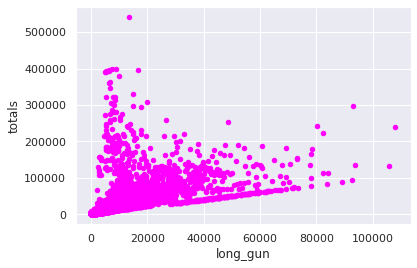

In [207]:
# check for the relationship between long gun and number of checks, i expect a positive relationship
colors = ['magenta']
gun.plot(kind = "scatter" ,x ="long_gun", y = "totals", color=colors);


## What is the total number of registered Guns in each state?

In [185]:

guns_per_state = gun.groupby("state")["totals"].sum()
guns_per_state

state
Alabama            6706079
Alaska             1137643
Arizona            4425714
Arkansas           3752633
California        19014063
Colorado           6058482
Connecticut        3168126
Delaware            491369
Florida           11695777
Georgia            7209942
Hawaii              197580
Idaho              1968134
Illinois          15471534
Indiana            7737172
Iowa               2297156
Kansas             2624669
Kentucky          29762434
Louisiana          4705057
Maine              1257457
Maryland           2035652
Massachusetts      2571321
Michigan           7254279
Minnesota          6279271
Mississippi        3576312
Missouri           6549018
Montana            1884124
Nebraska           1136209
Nevada             1731797
New Hampshire      1583148
New Jersey         1145846
New Mexico         2076591
New York           4643828
North Carolina     7777689
North Dakota        947440
Ohio               8462744
Oklahoma           4584454
Oregon             375

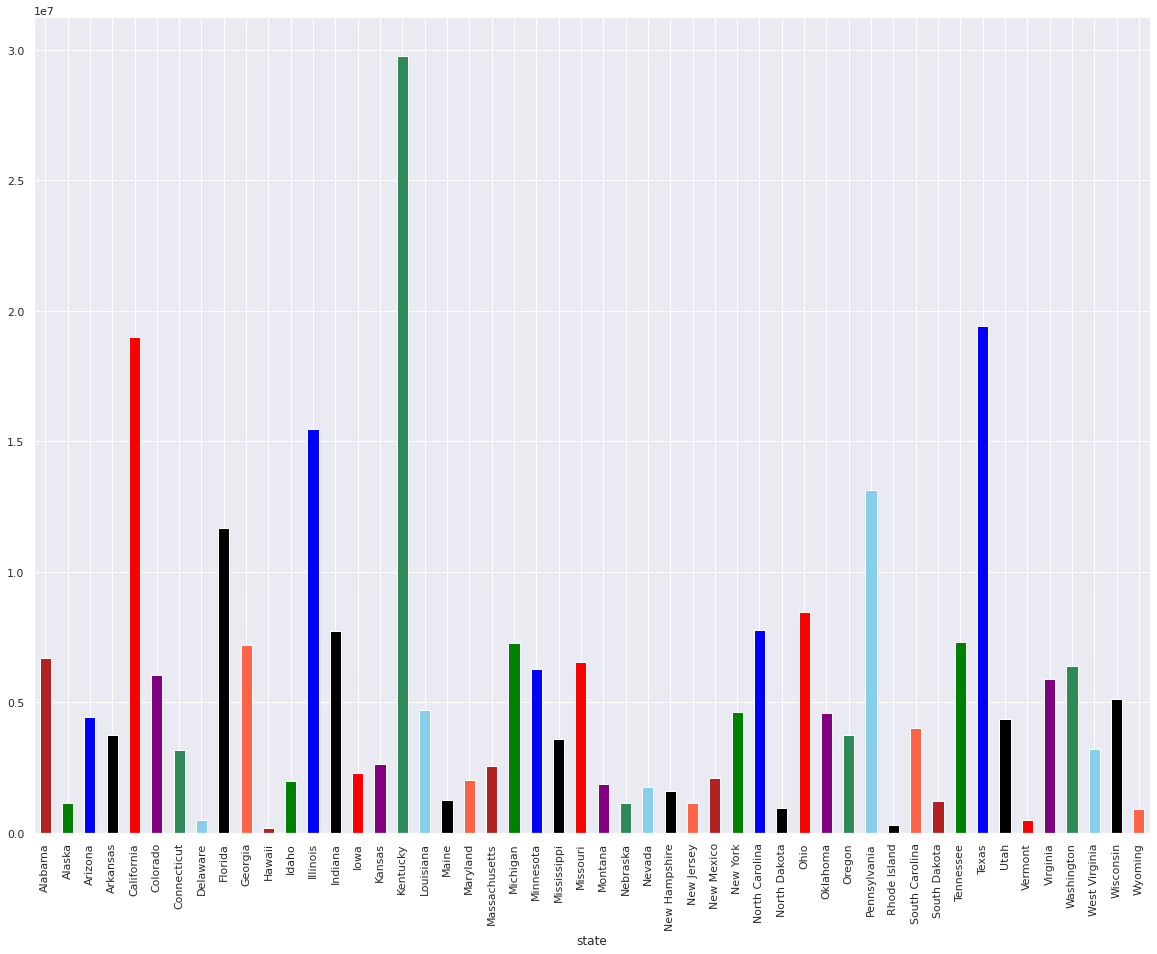

In [197]:
guns_per_state.plot(kind ="bar",color=['firebrick', 'green', 'blue', 'black', 'red',  'purple', 'seagreen', 'skyblue', 'black', 'tomato'],figsize=(20,15));


## Limitations
Missing values in the data.

Both datasets are not normally distributed.

## Findings

The overall trend of gun purchases is positive, from the graph we can see how it increases over time.

The long gun is the most popular and most owned gun.

Kentucky is the state with the most gun sales, Hawaii is the least. Kentucky data shhould also be looked in to, as it is the main cause of outliers in the data.

 States cannot be compared directly.

 Further analysis is required to actually make better conclusions.


## Resources

For dropping multiple rows 
https://moonbooks.org/Articles/How-to-remove-one-or-multiple-rows-in-a-pandas-DataFrame-in-python-/


https://www.machinelearningplus.com/plots/bar-plot-in-python/


https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib

https://www.youtube.com/watch?v=WuNGsB16Dzo&t=206s

https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

https://pandas.pydata.org/docs/user_guide/indexing.html

https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex
